In [13]:
import os
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,f1_score,classification_report, roc_curve
import matplotlib.pyplot as plt
print('all packages are imported')

all packages are imported


In [2]:
#read data
NaturalBlurSet = pd.read_excel("C:/Users/Client/Desktop/blur detection/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet.xlsx")
DigitalBlurSet = pd.read_excel("C:/Users/Client/Desktop/blur detection/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet.xlsx")

In [3]:
print('informations about the dataset')
NaturalBlurSet.info()

informations about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image Name  1000 non-null   object
 1   Blur Label  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
NaturalBlurSet.isnull().sum() 

Image Name    0
Blur Label    0
dtype: int64

In [5]:
DigitalBlurSet['MyDigital Blur'] = DigitalBlurSet['MyDigital Blur'].apply(lambda x : x.strip())
DigitalBlurSet = DigitalBlurSet.rename(index=str, columns={"Unnamed: 1": "Blur Label"})
DigitalBlurSet = DigitalBlurSet.rename(index=str, columns={"MyDigital Blur": "Image Name"})

In [6]:
def laplacian_variance_image(image):
    # compute the Laplacian of the image and then return the focus
    #convolves the image with the 3 x 3 Laplacian operator and returns the variance.
    return cv2.Laplacian(image, cv2.CV_64F).var() # grayscale image

In [8]:
# loop over the input images
threshold =300 #fix a threshold ( nees to tune the value depend on the dataset)
def detect_blur(img_Path):
    image = cv2.imread(img_Path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = laplacian_variance_image(gray) 
    label = -1  # clear image
    if fm < threshold:
        label = 1   # blur image
    return label 

In [9]:
#prediction
Natural_test_value = []
Natural_predicted_value = []
Digital_test_value = []
Digital_predicted_value = []

#zip :return a zip object : generate a list of tuples that contain elements from each image name and blur label 
for name_im,label in zip(NaturalBlurSet["Image Name"],NaturalBlurSet["Blur Label"]): 
    path = 'C:/Users/Client/Desktop/blur detection/CERTH_ImageBlurDataset/EvaluationSet/NaturalBlurSet'
    img_path=os.path.join(path ,name_im +'.jpg')
    Natural_predicted_value.append(detect_blur(img_path))
    Natural_test_value.append(label)
    
for name_im,label in zip(DigitalBlurSet["Image Name"],DigitalBlurSet["Blur Label"]):
    path = 'C:/Users/Client/Desktop/blur detection/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet'
    img_path=os.path.join(path ,name_im)
    Digital_predicted_value.append(detect_blur(img_path))
    Digital_test_value.append(label) 

In [10]:
accuracy_NBS=accuracy_score(Natural_test_value,Natural_predicted_value)
print("accuracy Score for NaturalBlurSet: {:.2f}%".format(accuracy_NBS * 100))

accuracy Score for NaturalBlurSet: 48.70%


In [11]:
accuracy_DBS=accuracy_score(Digital_test_value,Digital_predicted_value)
print("accuracy Score for DigitalBlurSet: {:.2f}%".format(accuracy_DBS * 100))

accuracy Score for DigitalBlurSet: 95.83%


Confusion matrix : 
 [[ 81 508]
 [  5 406]]
Natural Blur dataset roc_acc :  0.5626778861446057
Classification report : 
               precision    recall  f1-score   support

          -1       0.94      0.14      0.24       589
           1       0.44      0.99      0.61       411

    accuracy                           0.49      1000
   macro avg       0.69      0.56      0.43      1000
weighted avg       0.74      0.49      0.39      1000



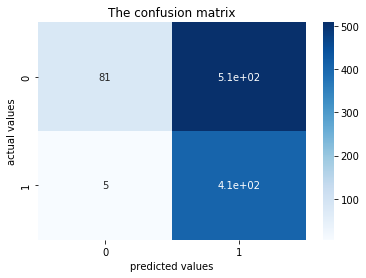

In [14]:
# Evaluation
#Receiver Operating Characteristic (ROC) curve
c_matrix = confusion_matrix(Natural_test_value,Natural_predicted_value)
print('Confusion matrix : \n',c_matrix)



fpr, tpr, threshold=metrics.roc_curve(Natural_test_value,Natural_predicted_value)
roc_auc = metrics.auc(fpr, tpr)
print("Natural Blur dataset roc_acc : ",roc_auc)  #false positive rate & true positive rate

#classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(Natural_test_value,Natural_predicted_value)
print('Classification report : \n',cl_rep)

#Draw Confusion Matrix 
sns.heatmap(c_matrix, annot=True,cmap='viridis')
plt.title('The confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()


 

Digital Blur dataset roc_acc :  0.6666666666666667
Classification report : 
               precision    recall  f1-score   support

          -1       1.00      0.33      0.50        30
           1       0.96      1.00      0.98       450

    accuracy                           0.96       480
   macro avg       0.98      0.67      0.74       480
weighted avg       0.96      0.96      0.95       480

Confusion matrix : 
 [[ 10  20]
 [  0 450]]


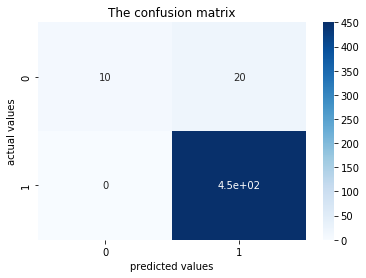

In [15]:
fpr, tpr, threshold=roc_curve(Digital_test_value,Digital_predicted_value)
roc_auc = metrics.auc(fpr, tpr)
print("Digital Blur dataset roc_acc : ", roc_auc)

#classification report for precision, recall f1-score and accuracy
cl_rep = classification_report(Digital_test_value,Digital_predicted_value)
print('Classification report : \n',cl_rep)

c_matrix = confusion_matrix(Digital_test_value,Digital_predicted_value)
print('Confusion matrix : \n',c_matrix)

#Draw Confusion Matrix 
sns.heatmap(c_matrix, annot=True,cmap='viridis')
plt.title('The confusion matrix')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.show()
